## Linear Regression
Here we can do linear regression by applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.
$$
y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
$$

or 
$$
y = (w1 + p*error*alpha)x + (w2 + 1*error*alpha)
$$

from equation we can see that for best fit line we have to add p times error times alpha in slope and 1 times error times alpha in y_intercept or in other words we are updating our slope and intercept by adding these values
after updating slope and intercept our line moves , means value of q-q' changes so we also have to change this value in our formula every time

In [18]:
%%HTML
<img src="LR_steps.jpeg">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.loadtxt('data.csv', delimiter = ',')

In [4]:
x = data[:,:-1]
y = data[:,-1]

#showing data in pandas
df = pd.DataFrame(columns=['x','y'])
t=[]
for i in range(0,len(x)):
    t.append(x[i][0])
df['y'] = y
df['x'] = t
df

,x,y
0,-0.72407,2.23863
1,-2.40724,-0.00156
2,2.64837,3.01665
3,0.36092,2.31019
4,0.67312,2.05950
...,...,...
95,-0.92159,1.21538
96,0.76953,2.39377
97,0.03283,1.55730
98,-1.07619,0.70874


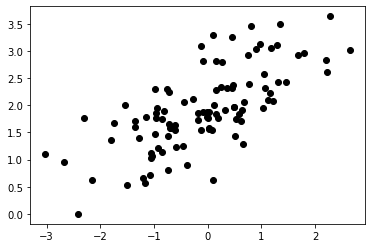

In [5]:
plt.plot(x,y,'o', color='black')

In [6]:
#y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
''' start initially with w_1 = 0 and w_2 = 0 and generate a line'''
y_pred = []
w_1 = 0
w_2 = 0
for i in range(0,len(x)):
    y_pred.append((w_1*x[i][0])+w_2)

In [7]:
df['y_pred when w_1 and w_2 are 0'] = y_pred
df

,x,y,y_pred when w_1 and w_2 are 0
0,-0.72407,2.23863,0.0
1,-2.40724,-0.00156,0.0
2,2.64837,3.01665,0.0
3,0.36092,2.31019,0.0
4,0.67312,2.05950,0.0
...,...,...,...
95,-0.92159,1.21538,0.0
96,0.76953,2.39377,0.0
97,0.03283,1.55730,0.0
98,-1.07619,0.70874,0.0


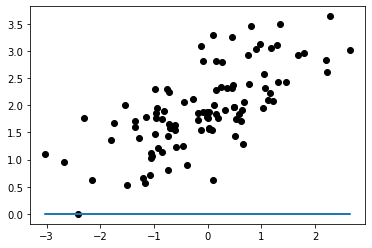

In [8]:
plt.plot(x,y,'o', color='black')
plt.plot(x,y_pred)

In [9]:
'''Error/(q-q') between line and points '''
error_when_w_and_b_are_zero = []
for i in range(0,len(y)):
    error_when_w_and_b_are_zero.append(y[i] - y_pred[i])
print("Sum of mean square Error",sum([i**2 for i in error_when_w_and_b_are_zero])/len(error_when_w_and_b_are_zero))



Sum of mean square Error 4.2541289696539994


### We have to move this line many times until it becomes best (min error), now we will move this line using loop

In [10]:
'''this function will move the line using new w_1 and w_2 and calculate the error between new_line and points '''
def error_list(w_1,w_2):
    #y_pred = w_1 * x + w_2
    y_pred = []
    for i in range(0,len(x)):
        y_pred.append((w_1*x[i][0])+w_2)
    # error = y - y_pred
    error = []
    for j in range(0,len(x)):
        error.append(y[j] - y_pred[j])
    return error

In [11]:
#w_1_new = w_1_old + (y-y_pred) * p * learnung_rate  
#w_2_new = w_2_old + (y-y_pred) * alpha
'''updating w_1 and w_2'''

def update(iterate):
    w_1 = 0
    w_2 = 0
    plt.plot(x,y,'o', color='black')
    for i in range(0,iterate): # i am moving line 50times , you can change it
        errors = error_list(w_1,w_2)  # as w1 and w2 are changing it means that line is also moving so we have to calculate new q-q' w.r.t to new line
#         print(errors)
        # add (q-q') * x * learning rate in w1
        w_1 += np.matmul(errors,t) * 0.005   #t=x #matmul ---> multiply array element by element and then add it
        # add q-q' * learning_rate in w2
        w_2 += sum(errors)* 0.005
        print("sum of squared_error", sum([i**2 for i in errors])/len(errors))
    # plotting graph with are slope and intercept
    y_pred = []
    for i in range (0,len(y)):
         y_pred.append((w_1 * x[i][0] ) + w_2)
    plt.plot(x,y_pred)   


sum of squared_error 4.2541289696539994
sum of squared_error 1.3282785028616737
sum of squared_error 0.554769335668366
sum of squared_error 0.3493658314749271
sum of squared_error 0.2946928182907804
sum of squared_error 0.28012221157585887
sum of squared_error 0.27623654060342934
sum of squared_error 0.27519995910366146
sum of squared_error 0.27492338016298606
sum of squared_error 0.2748495768591341
sum of squared_error 0.27482988194803337
sum of squared_error 0.27482462609109093
sum of squared_error 0.2748232234745137
sum of squared_error 0.274822849159278
sum of squared_error 0.27482274926567707
sum of squared_error 0.27482272260699403
sum of squared_error 0.27482271549256326
sum of squared_error 0.27482271359392674
sum of squared_error 0.27482271308723516
sum of squared_error 0.2748227129520136
sum of squared_error 0.27482271291592697
sum of squared_error 0.27482271290629645
sum of squared_error 0.2748227129037264
sum of squared_error 0.2748227129030405
sum of squared_error 0.274822

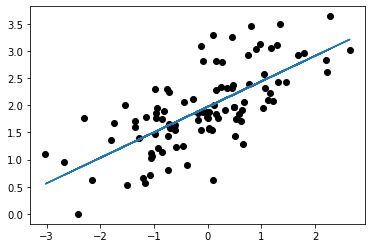

In [12]:
update(50)

In [15]:
'''In 7 iterations this is how our line became best fitted'''
'''
STEPS
    Draw a line using w1 * x + w2 by putting w1 and w2  = 0
    plot it
    calculate error between line and points
    update w1 and w2
    repeat the process
'''
def update2(iterate):
    w_1 = 0
    w_2 = 0
    plt.plot(x,y,'o', color='black')
    for i in range(0,iterate): # i am moving line 100 times , you can change it
        y_pred = [((w_1 * x[i][0] ) + w_2) for i in range(0,100)] 
        plt.plot(x,y_pred)
        errors = error_list(w_1,w_2)  # as w1 and w2 are changing it means that line is also moving so we have to calculate new q-q' w.r.t to new line
        #rint(errors)
        print("sum of squared_error", sum([i**2 for i in errors])/len(errors))
        # add (q-q') * x * learning rate in w1
        w_1 += np.matmul(errors,t) * 0.005   #t=x
        # add q-q' * learning_rate in w2
        w_2 += sum(errors)* 0.005
         



sum of squared_error 4.2541289696539994
sum of squared_error 1.3282785028616737
sum of squared_error 0.554769335668366
sum of squared_error 0.3493658314749271
sum of squared_error 0.2946928182907804
sum of squared_error 0.28012221157585887
sum of squared_error 0.27623654060342934


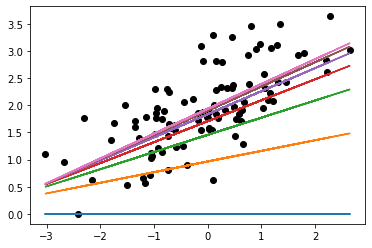

In [16]:
update2(7)